# Avaliação de Redes Complexas

Nome: Ivan Barbosa Pinheiro NUSP: 9050552

<hr>

**1 -** (a) Crie o gráfo a seguir usando a biblioteca networkx e mostre o gráfo.<br>
Link para visualizar o grafo: https://commons.wikimedia.org/wiki/File:6n-graf.png<br>

In [1]:
import networkx as nx
import math
import random
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
from scipy.stats import pearsonr
from google.colab import drive
from scipy.sparse.csgraph import shortest_path

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
G = nx.Graph()

In [4]:
G.add_node('1')
G.add_node('2')
G.add_node('3')
G.add_node('4')
G.add_node('5')
G.add_node('6')

In [5]:
G.add_edge('1','2')
G.add_edge('1','5')
G.add_edge('2','5')
G.add_edge('2','3')
G.add_edge('5','4')
G.add_edge('3','4')
G.add_edge('4','6')

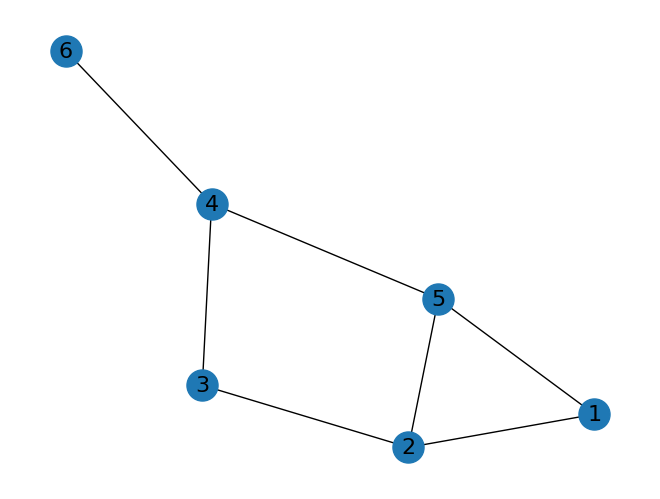

In [6]:
pos=nx.spring_layout(G)
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

(b) Simule uma caminha aleatória nesse grafo e monte uma matriz onde o elemento Mij representa o número de visitas ao vértice j dado que a caminhada iniciou em i. Considere pelo menos 100 passos. Compare o número de visitas com a medida eigenvector centrality de cada vértice.

In [7]:
# Seleciona um nó aleatório para iniciar os passos
no_atual = random.choice(list(G.nodes))
matriz = np.zeros((6, 6), dtype=int)

# Realiza 100 passos aleatórios
for _ in range(10):
    vizinhos = list(G.neighbors(no_atual))
    if not vizinhos:
        break
    proximo_no = random.choice(vizinhos)
    matriz[int(no_atual) - 1][int(proximo_no) - 1] += 1
    no_atual = proximo_no

<hr>

Correlação de Pearson: 0.7866758961148508


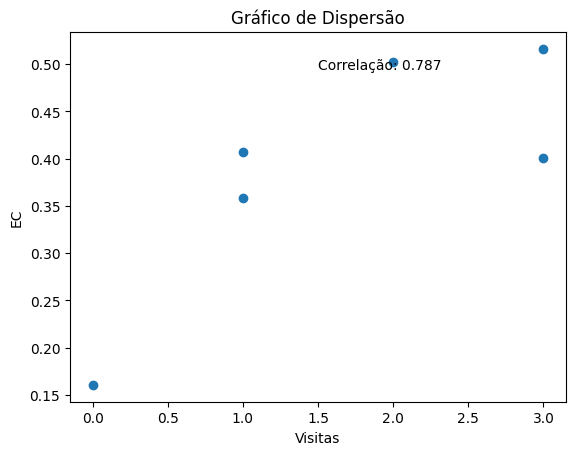

In [8]:
# Calcula a medida eigenvector centrality de cada vértice
EC = dict(nx.eigenvector_centrality(G, max_iter = 100))
EC = list(EC.values())

vertices = range(6)
# Soma o total de visitas en cada nó
visitas = [matriz[i].sum() for i in vertices]

# Calcula a correlação de Pearson
correlation, p_value = pearsonr(visitas, EC)
print("Correlação de Pearson:", correlation)

# Plota o gráfico
plt.plot(visitas, EC, 'o')
plt.xlabel('Visitas')
plt.ylabel('EC')
plt.title('Gráfico de Dispersão')

# Adiciona a correlação no gráfico
correlation_text = f'Correlação: {correlation:.3f}'
plt.text(0.5, 0.9, correlation_text, transform=plt.gca().transAxes)

plt.show()

**2 -** (a) Leia a rede do arquivo advogato.txt e mostre a distribuição acumulada complementar do grau, isto é, $P(K > k)$.

In [9]:
def get_largest_component(self):
  Gcc = sorted(nx.connected_components(self), key=len, reverse=True)
  graph_largest_component = self.subgraph(Gcc[0])
  return graph_largest_component

In [10]:
def read_file(fileName):
  self = nx.read_edgelist(f'drive/MyDrive/DataComplexNetworks/{fileName}.txt', nodetype=int, data=(('weight', float),))  
  self = self.to_undirected()
  self.remove_edges_from(nx.selfloop_edges(self))
  Gcc = sorted(nx.connected_components(self), key=len, reverse=True)
  self = self.subgraph(Gcc[0])
  self = nx.convert_node_labels_to_integers(self, first_label=0)
  return self  

In [11]:
lesmis = get_largest_component(read_file('lesmis'))

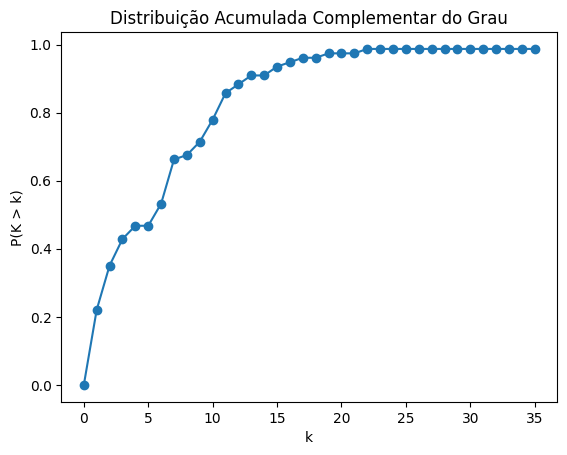

In [12]:
# Obtém a distribuição de graus dos nós do grafo
graus = [lesmis.degree(n) for n in lesmis.nodes()]

# Calcula a distribuição acumulada complementar
distribuicao_acumulada = [1 - (np.sum(np.array(graus) > k) / len(graus)) for k in range(max(graus))]

# Plota a distribuição acumulada complementar
plt.plot(range(max(graus)), distribuicao_acumulada, marker='o')
plt.xlabel('k')
plt.ylabel('P(K > k)')
plt.title('Distribuição Acumulada Complementar do Grau')
plt.show()

(b) Mostre o gráfico de Knn(k), ou seja, o grau médio dos vizinhos dos vértices de grau k em função do grau k.

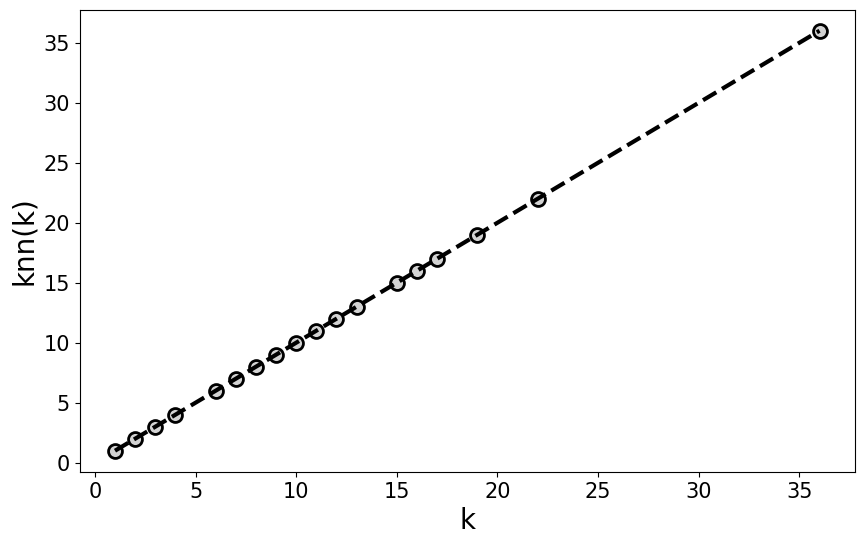

In [13]:
vk = dict(lesmis.degree())
vk = list(vk.values())

# Converter vk para um array NumPy
vk = np.array(vk)  
knnk = []
ks = []

for k in np.arange(np.min(vk), np.max(vk) + 1):
    aux = vk == k
    # Verificar se existem elementos que satisfazem a condição
    if np.sum(aux) > 0:  
        # Clustering médio entre todos os nós com grau k
        av_knn = np.mean(vk[aux])  
        knnk.append(av_knn)
        ks.append(k)

fig = plt.figure(figsize=(10, 6))
plt.plot(ks, knnk, '-o', color='gray', markersize=10, linewidth=0,
         markerfacecolor='lightgray',
         markeredgecolor='black',
         markeredgewidth=2)
plt.ylabel("knn(k)", fontsize=20)
plt.xlabel("k", fontsize=20)

# Determine best fit line
par = np.polyfit(ks, knnk, 1, full=True)
slope = par[0][0]
intercept = par[0][1]
xl = [min(ks), max(ks)]
yl = [slope * xx + intercept for xx in xl]
plt.plot(xl, yl, '--', linewidth=3, color='black')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show(True)

(c) Calcule a matriz de menores distâncias $D$ a matriz $A^n$, que presenta o número de caminhadas de comprimento $n$ entre cada par de vértices. Faça um gráfico da correlação entre $D_{ij}$ e $A_{ij}$ para diferentes valores de $n$. Ou seja, um gráfico em que o eixo x representa n e o y, a correlação entre essas duas matrizes.

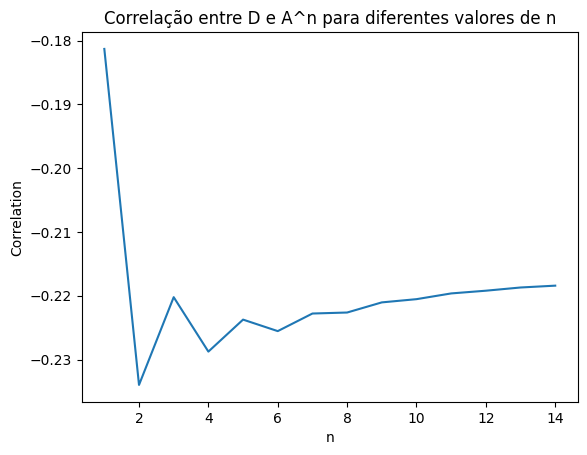

In [14]:
# Obter a matriz de adjacência An do grafo
An = nx.adjacency_matrix(lesmis).toarray()

# Definir os valores de n
n_values = []
for i in range(1, 15):
  n_values.append(i)


# Listas para armazenar os valores de n e as correlações correspondentes
values_of_n = []
correlations = []

# Calcular as matrizes de menores distâncias e correlações para cada valor de n
for n in n_values:
    # Calcular a matriz de menores distâncias D
    D = shortest_path(An)

    # Calcular a matriz An elevada à potência n
    An_power_n = np.linalg.matrix_power(An, n)

    # Calcular a correlação entre D e An_power_n
    correlation = np.corrcoef(D.flatten(), An_power_n.flatten())[0, 1]

    # Armazenar os valores de n e correlações
    values_of_n.append(n)
    correlations.append(correlation)

# Plotar o gráfico da correlação em função do valor de n
plt.plot(values_of_n, correlations)
plt.xlabel('n')
plt.ylabel('Correlation')
plt.title('Correlação entre D e A^n para diferentes valores de n')
plt.show()

<hr>

**3 -** Considere a rede do arquivo internet_routers-22july06.gml. Escreva um código que calcule as seguintes medidas: (a) grau médio, (b) transitividade, (c) segundo momento da distribuição do grau, (d) entropia de Shannon da distribuição do grau, (e) coeficiente de assortatividade. Considere apenas o maior componente. Armazene os valoes em uma lista e imprima essa lista, indicando os valores de cada medida. 

In [15]:
def average_degree_func(self):
  N = len(self)
  M = self.number_of_edges()
  return 2*M/N

In [16]:
def transitivity_func(self):
  CC = (nx.transitivity(self)) 
  return CC

In [17]:
def degree_distribution(self):
    vk = dict(self.degree())
    vk = list(vk.values()) 
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues= arange(0,maxk+1) 
    Pk = np.zeros(maxk+1) 
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) 
    return kvalues,Pk

In [18]:
def momment_of_degree_distribution(self,m):
    k,Pk = degree_distribution(self)
    M = sum((k**m)*Pk)
    return M

In [19]:
def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

In [20]:
# Obter o maior componente conectado
graph_largest_component = get_largest_component(read_file('internet_routers-22july06'))

degree_sequence = [degree for node, degree in graph_largest_component.degree()]
average_degree = average_degree_func(graph_largest_component)
transitivity = transitivity_func(graph_largest_component)
second_moment = momment_of_degree_distribution(graph_largest_component, 2)

# Shannon Entropy 
edge_numbers = graph_largest_component.number_of_nodes()
p = average_degree/(edge_numbers-1)  
entropy_degree = shannon_entropy(graph_largest_component)

# Assortativity
p = average_degree/(edge_numbers-1)  
r = nx.degree_assortativity_coefficient(graph_largest_component)

medidas = [
    ("Grau médio", average_degree),
    ("Transitividade", transitivity),
    ("Segundo momento da distribuição do grau", second_moment),
    ("Entropia de Shannon da distribuição do grau", entropy_degree),
    ("Coeficiente de assortatividade", r)
]

# Imprimir os valores das medidas
for medida in medidas:
    nome_medida = medida[0]
    valor_medida = "{:.3f}".format(medida[1])
    print(f"{nome_medida}: {valor_medida}")

Grau médio: 4.219
Transitividade: 0.011
Segundo momento da distribuição do grau: 1103.000
Entropia de Shannon da distribuição do grau: 2.366
Coeficiente de assortatividade: -0.198


<hr>

**4 -** Simule o modelo de propagação de epidemias SIR na rede de aeroportos dos EUA (USairport_2010.txt). Calcule a correlação de Pearson entre a fração final de recuperados e as seguintes medidas de centralidade: (a) grau, (b) betweenness centrality, (c) eigenvector centrality, (d) closenness centrality. Mostre os resultados e indique a maior correlação. Considere $\beta = 0.6$ e $\mu = 0.1$ no modelo SIR.

In [25]:
# us_airport = get_largest_component(read_file('USairport_2010'))
us_airport = read_file('USairport_2010')

In [26]:
# function to simulate the SIR dynamics starting from a single seed node
def SIR_single_seed(G, seed, N, beta=0.3, mu=1):    
    def find(v, i): # function to find the positions of element i in vector v
        l = []
        pos = 0
        for x in v:
            if(x == i):
                l.append(pos)
            pos = pos + 1
        return l

    #Reactive process: SIR dynamics
    seed_node = seed; # seed node
    vector_states = np.zeros(N) # vector that stores the states of the vertices
    vector_states[seed_node] = 1 # vector that stores the states
    ninfected = 1
    t = 0 # start in t= 0 
    infected = list() # this list stores the infected nodes at each step
    vt = list() # this list stores the time step
    vI = list() # this list stores the fraction of infected nodes
    vR = list() # this list stores the fraction of recovered nodes
    vS = list() # this list stores the fraction of susceptible nodes
    # Reactive model simulation
    while ninfected > 0: # Simulate while we can find infected nodes
        infected = find(vector_states,1) # list of infected nodes
        for i in infected: # try to infect the neighbors
            neigs = G.neighbors(i)
            for j in neigs:
                if np.random.rand() < beta:
                    if(vector_states[j] != 2): # verify if the node is not recovered
                        vector_states[j] = 1
        for k in infected: # try to recover the infected nodes
            if np.random.rand() < mu:
                vector_states[k] = 2
        ninfected = len(find(vector_states,1))
        vI.append(ninfected/N)
        vR.append(len(find(vector_states,2))/N)
        vS.append(len(find(vector_states,0))/N)
        t = t + 1
        vt.append(t)
    return vI, vS, vR, vt

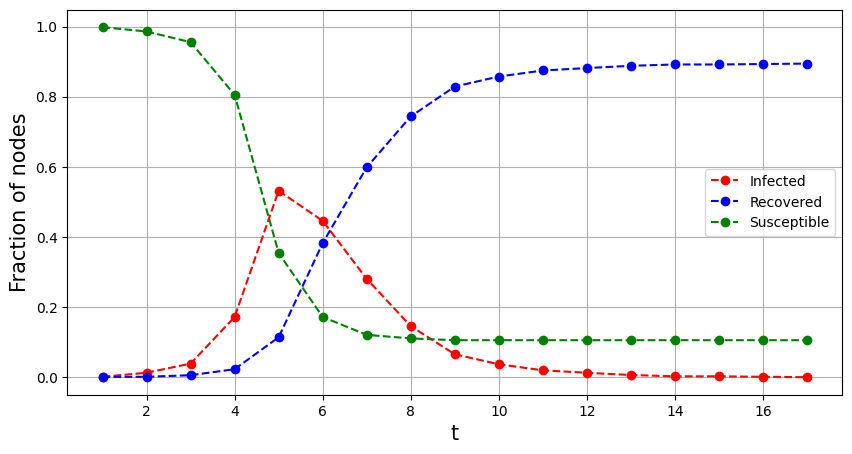

In [27]:
# Epidemic parameters
beta = 0.45 # Probability of infection
mu = 0.5  # Probability of recovering
seed = 0
vI, vS, vR, vt = SIR_single_seed(us_airport, seed, len(us_airport), beta, mu)
    
plt.figure(figsize=(10,5))
plt.plot(vt, vI, 'ro--', label='Infected')
plt.plot(vt, vR, 'bo--', label='Recovered')
plt.plot(vt, vS, 'go--', label='Susceptible')
plt.xlabel("t", fontsize=15)
plt.ylabel("Fraction of nodes", fontsize=15)
plt.legend()
plt.grid(True)
plt.show(True)

<hr>

In [78]:
# Obtenha uma lista de todos os nós do grafo
all_nodes = list(us_airport.nodes())

# Divisão do total de nós para que fosse possível o processamento em um tempo hábil
random_node_list = [random.choice(all_nodes) for _ in range(int(len(us_airport.nodes())/10))]

In [79]:
subgraph = us_airport.subgraph(random_node_list)

In [42]:
# 25% do grafo
# random_node_list = [ 528, 1081, 405, 203, 1436, 249, 1254, 796, 1043, 778, 346, 1386, 947, 264, 1131, 44, 254, 1102, 1414, 718, 247, 773, 448, 545, 941, 1532, 1445, 1358, 1321, 1420, 323, 1164, 783, 792, 781, 1136, 717, 993, 590, 959, 1300, 335, 994, 1463, 488, 961, 181, 747, 798, 436, 348, 597, 1505, 1257, 1496, 466, 168, 1513, 778, 1560, 98, 1193, 800, 1459, 1088, 982, 1461, 916, 64, 1002, 566, 695, 835, 1364, 286, 1378, 590, 169, 483, 450, 1120, 1357, 887, 663, 198, 1442, 614, 203, 861, 615, 1286, 1371, 308, 695, 187, 1013, 223, 1379, 1503, 82, 860, 562, 1390, 846, 305, 122, 700, 1431, 872, 924, 1247, 1261, 503, 355, 778, 850, 1279, 884, 930, 153, 1270, 1233, 508, 1107, 131, 298, 211, 308, 25, 31, 1108, 590, 289, 770, 93, 584, 1083, 573, 1076, 53, 823, 1218, 618, 12, 453, 430, 1276, 603, 1285, 1210, 404, 1158, 1274, 1509, 278, 982, 263, 63, 849, 351, 540, 875, 20, 552, 498, 1384, 1508, 26, 1336, 1248, 864, 1135, 545, 305, 289, 1310, 355, 1058, 535, 984, 1169, 1302, 1091, 822, 332, 1550, 290, 658, 851, 51, 1481, 885, 217, 990, 1311, 595, 182, 150, 1121, 1554, 454, 278, 1467, 648, 208, 1016, 1035, 1079, 132, 1072, 1256, 1373, 989, 1261, 611, 821, 1402, 1295, 717, 512, 1429, 495, 826, 1199, 1061, 1186, 942, 1409, 824, 779, 648, 488, 1081, 431, 1553, 2, 221, 1032, 377, 283, 758, 336, 265, 227, 1560, 906, 138, 1519, 338, 640, 276, 706, 68, 189, 772, 1137, 1353, 472, 1003, 258, 1303, 609, 570, 420, 1157, 445, 336, 904, 278, 852, 1169, 439, 1178, 919, 360, 1376, 395, 1448, 1498, 1097, 80, 263, 250, 598, 485, 1089, 1312, 930, 97, 1510, 1439, 698, 470, 918, 976, 1342, 1031, 1293, 783, 40, 61, 718, 1184, 575, 1415, 912, 476, 35, 464, 1553, 313, 1149, 580, 1280, 319, 1427, 455, 1171, 1169, 1272, 69, 732, 359, 178, 683, 1440, 971, 962, 782, 946, 1269, 953, 40, 417, 412, 1536, 1363, 350, 1068, 435, 730, 1464, 815, 713, 368, 999, 1316, 727, 1031, 1014, 353, 143, 1318, 1093, 352, 530, 1135, 1255, 1321, 1432, 1520, 642, 1271, 650, 82, 413, 228, 1420, 1117, 424, 491, 773, 974, 1362, 1179, 191, 1204, 1399, 1291, 1427, 1192, 233, 1466, 203, 764, 1309, 960, 1153, 333, 1132, 624, 1283, 1496, 186, 415, 181, 1197, 1381, 840, 1442, 76, 1310, 965, 671, 1210, 823, 1288, 30, 577, 601, 531, 219, 954, 145, 430, 232, 402, 403, 729, 316, 993, 528, 1324, 165, 1173, 1012, 209, 1336, 580, 367, 1343, 1570, 143, 1010, 1329, 792, 1357, 50, 117, 623, 734, 781, 1080, 901, 837, 1230, 1311, 1461, 1184, 746, 342, 251, 629, 1257, 1454, 1435, 380, 190, 683, 1032, 963, 1041, 913, 1149, 544, 959, 67, 1285, 1252, 1183, 1554, 521, 388, 1033, 1468, 194, 1291, 1042, 1418, 775, 930, 53, 748, 1042, 1426, 601, 299, 791, 447, 383, 900, 1069, 52, 368, 1141, 728, 331, 685, 1034, 919, 1135, 1544, 610, 1118, 426, 887, 1429, 121, 902, 874, 743, 23, 515, 2, 524, 1199, 261, 120, 1494, 1236, 702, 864, 1284, 346]

In [80]:
beta = 0.45 # Probability of infection
mu = 0.1  # Probability of recovering
N = len(us_airport)
correlations = []

centrality_measures = ['degree', 'betweenness', 'eigenvector', 'closeness']
for measure in centrality_measures:
    # Calcular a medida de centralidade para cada nó
    if measure == 'degree':
        centrality = dict(us_airport.degree())
    elif measure == 'betweenness':
        centrality = nx.betweenness_centrality(us_airport)
    elif measure == 'eigenvector':
        centrality = nx.eigenvector_centrality(us_airport)
    elif measure == 'closeness':
        centrality = nx.closeness_centrality(us_airport)

    # Simular o modelo SIR para cada nó como semente (infectado inicialmente)
    final_recovered = []
    for seed in subgraph.nodes():
        vI, vS, vR, vt = SIR_single_seed(us_airport, seed, N, beta, mu)

        # Calcular a fração final de recuperados
        fraction_recovered = len(vR) / N
        final_recovered.append(fraction_recovered)

    # Calcular a correlação de Pearson entre a fração final de recuperados e a medida de centralidade
    correlation = pearsonr([centrality[node] for node in subgraph.nodes()], final_recovered)[0]
    correlations.append(correlation)

max_correlation = max(correlations)
max_centralit = centrality_measures[correlations.index(max_correlation)]

print("Maior correlação:", max_correlation)
print("Medida de centralidade que teve a maior correlação com a fração final de recuperados durante a execução do código:", max_centralit)

Maior correlação: 0.13735089962939934
Medida de centralidade que teve a maior correlação com a fração final de recuperados durante a execução do código: closeness


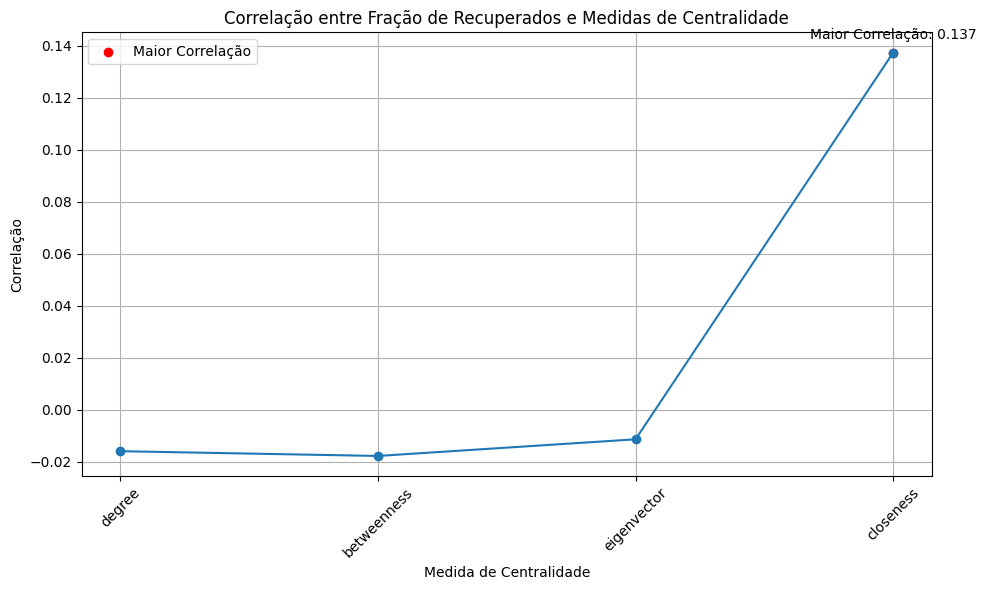

In [81]:
# Plotando os gráficos
plt.figure(figsize=(10, 6))

# Gráfico das correlações
plt.plot(centrality_measures, correlations, marker='o')
plt.xlabel('Medida de Centralidade')
plt.ylabel('Correlação')
plt.title('Correlação entre Fração de Recuperados e Medidas de Centralidade')
plt.xticks(rotation=45)
plt.grid(True)

# Destacando a maior correlação
max_index = correlations.index(max_correlation)
plt.scatter(max_centralit, max_correlation, color='red', label='Maior Correlação')
plt.annotate(f'Maior Correlação: {max_correlation:.3f}', (max_centralit, max_correlation),
             xytext=(0, 10), textcoords='offset points', ha='center')

plt.legend()
plt.tight_layout()
plt.show()

**5 -** Gere redes do tipo BA, ER e WS (p=0.05) com grau médio igual a 10 e N = 500. Desenvolva um estudo para mostrar que essas apresentam topologias diferentes. (Seja criativ@).

In [82]:
def barabasi_albert_graph(av_degree, N):
  m = int(av_degree/2)
  return nx.barabasi_albert_graph(N, m)

In [83]:
def erdos_renyi_graph(av_degree, N):
  p_erdos = av_degree/(N-1)
  return nx.erdos_renyi_graph(N, p_erdos)

In [84]:
def small_world_graph(av_degree, N, p):
  k = int(av_degree/2)
  return nx.watts_strogatz_graph(N, k, p, seed=None)

In [85]:
N = 500  # Número de nós
k = 10   # Grau médio
p = 0.05 # Probabilidade de rewiring para a rede WS

In [86]:
ba_graph = barabasi_albert_graph(k, N)
er_graph = erdos_renyi_graph(k, N)
ws_graph = small_world_graph(k, N, p)

In [87]:
def autovalor_centrality(graph):
    adj_matrix = nx.to_numpy_array(graph)
    eigenvalues, eigenvectors = np.linalg.eig(adj_matrix)
    centrality_values = np.abs(eigenvectors[:, 0]) / np.sum(np.abs(eigenvectors[:, 0]))
    centrality_dict = {}
    for node, value in enumerate(centrality_values):
        centrality_dict[node] = value

    return centrality_dict

In [146]:
# Lista das medidas de centralidade a serem calculadas
centrality_measures = ['degree', 'betweenness', 'eigenvector', 'closeness', 'diameter', 'clustering', 'average_shortest_path_length']

# Dicionário para armazenar os resultados das medidas de centralidade de cada rede
ba_centralities = {}
er_centralities = {}
ws_centralities = {}

for measure in centrality_measures:
    if measure == 'degree':
        ba_centralities[measure] = nx.degree_centrality(ba_graph)
        er_centralities[measure] = nx.degree_centrality(er_graph)
        ws_centralities[measure] = nx.degree_centrality(ws_graph)
    elif measure == 'betweenness':
        ba_centralities[measure] = nx.betweenness_centrality(ba_graph)
        er_centralities[measure] = nx.betweenness_centrality(er_graph)
        ws_centralities[measure] = nx.betweenness_centrality(ws_graph)
    elif measure == 'eigenvector':
        ba_centralities[measure] = autovalor_centrality(ba_graph)
        er_centralities[measure] = autovalor_centrality(er_graph)
        ws_centralities[measure] = autovalor_centrality(ws_graph)
    elif measure == 'closeness':
        ba_centralities[measure] = nx.closeness_centrality(ba_graph)
        er_centralities[measure] = nx.closeness_centrality(er_graph)
        ws_centralities[measure] = nx.closeness_centrality(ws_graph)
    elif measure == 'diameter':
        ba_centralities[measure] = {"ba_centralities":nx.diameter(ba_graph)}
        er_centralities[measure] = {"er_centralities":nx.diameter(er_graph)}
        ws_centralities[measure] = {"ws_centralities":nx.diameter(ws_graph)}
    elif measure == 'clustering':
        ba_centralities[measure] = nx.clustering(ba_graph)
        er_centralities[measure] = nx.clustering(er_graph)
        ws_centralities[measure] = nx.clustering(ws_graph)
    elif measure == 'average_shortest_path_length':
        ba_centralities[measure] = {"ba_centralities":nx.average_shortest_path_length(ba_graph)}
        er_centralities[measure] = {"er_centralities":nx.average_shortest_path_length(er_graph)}
        ws_centralities[measure] = {"ws_centralities":nx.average_shortest_path_length(ws_graph)}        

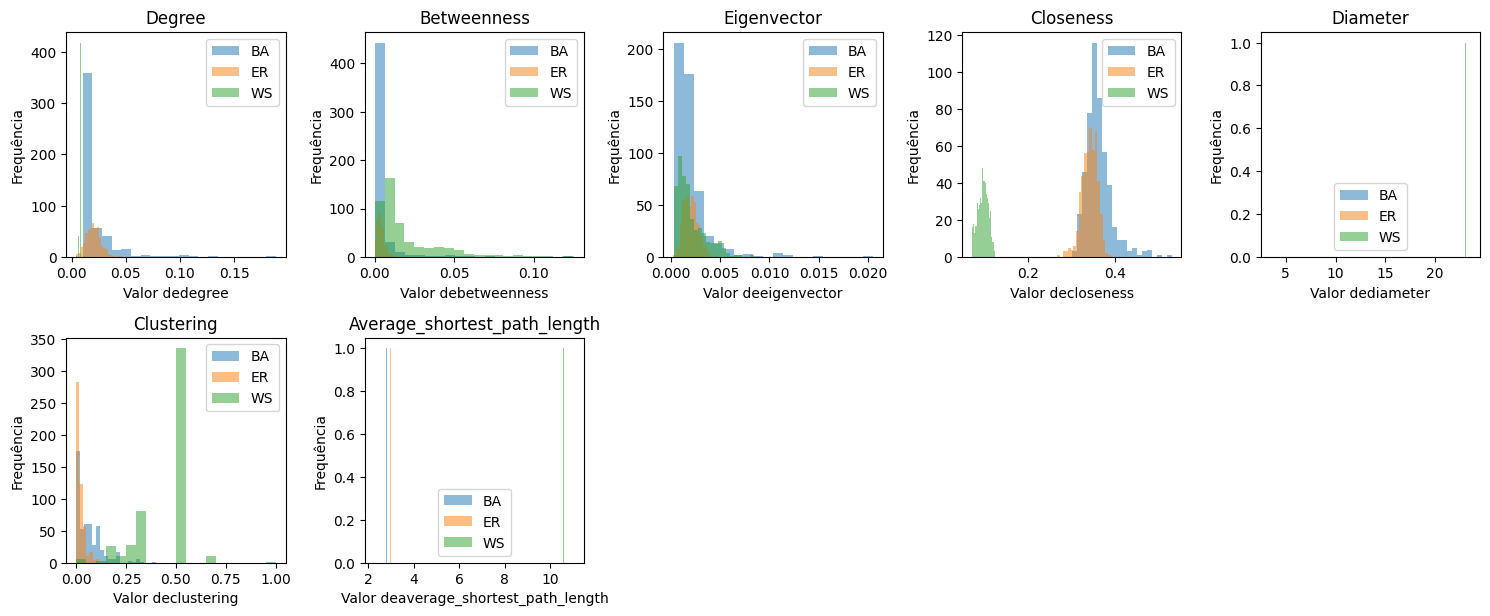

In [151]:
# Plotando as medidas de centralidade
plt.figure(figsize=(15, 15))

for measure in centrality_measures:
    plt.subplot(5, 5, centrality_measures.index(measure) + 1)

    ba_values = list(ba_centralities[measure].values())
    er_values = list(er_centralities[measure].values())
    ws_values = list(ws_centralities[measure].values())

    plt.hist(ba_values, bins=20, alpha=0.5, label='BA')
    plt.hist(er_values, bins=20, alpha=0.5, label='ER')
    plt.hist(ws_values, bins=20, alpha=0.5, label='WS')

    plt.xlabel('Valor de' + measure)
    plt.ylabel('Frequência')
    plt.title(measure.capitalize())
    plt.legend()

plt.subplots_adjust(wspace=1.5, hspace=1.5)
plt.tight_layout()
plt.show()

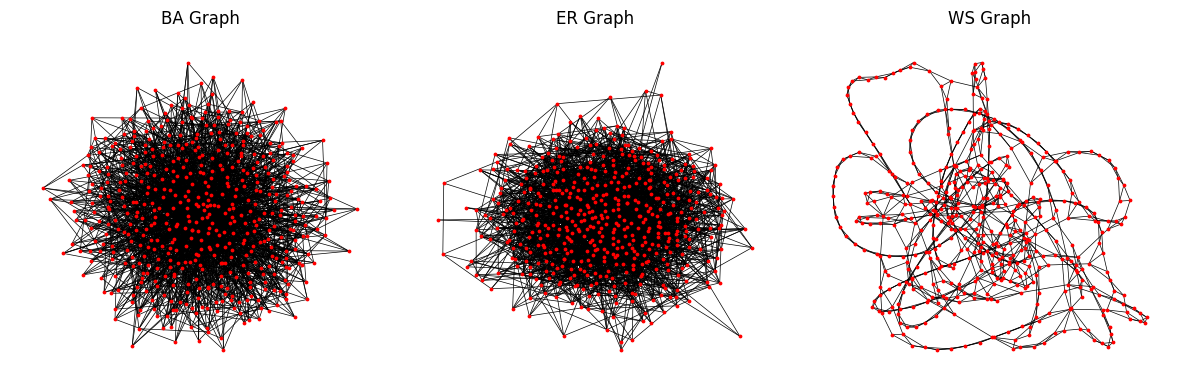

In [127]:
import networkx as nx
import matplotlib.pyplot as plt

# Crie os grafos ba_graph, er_graph e ws_graph

# Defina a figura e os subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plotando o grafo ba_graph
ax = axes[0]
nx.draw(ba_graph, ax=ax, node_size=3, node_color='red', width=0.5)
ax.set_title('BA Graph')

# Plotando o grafo er_graph
ax = axes[1]
nx.draw(er_graph, ax=ax, node_size=3, node_color='red', width=0.5)
ax.set_title('ER Graph')

# Plotando o grafo ws_graph
ax = axes[2]
nx.draw(ws_graph, ax=ax, node_size=3, node_color='red', width=0.5)
ax.set_title('WS Graph')

# Ajuste o espaçamento entre os subplots
plt.tight_layout()

# Mostrar os gráficos
plt.show()